<a href="https://colab.research.google.com/github/Ashishkr108/Learning-Path/blob/main/hyperparameter_optimisation_of_machine_learning_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import linraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier ,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR

import tensorflow as tf
from tensorflow import keras

import scipy.stats as stats

from sklearn import datasets

# **Load Boston Housing dataset**

In [17]:
#load Boston housing datasets
data = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
data

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
x, y = datasets.load_boston(return_X_y=True)

In [ ]:
x.shape,y.shape

((506, 13), (506,))

In [ ]:
list(data.feature_names)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

# **Baseline Machine Learning models: Regressors with Default Hyperparameter**

In [ ]:
#Random Forest
clf = RandomForestRegressor()
scores = cross_val_score(clf, x, y, cv=3,scoring='neg_mean_squared_error') # 3-fold cross-validation
print("MSE:"+ str(-scores.mean()))

MSE:28.83744316735933


In [ ]:
#SVM
clf = SVR(gamma='scale')
scores = cross_val_score(clf, x, y, cv=3,scoring='neg_mean_squared_error')
print("MSE:"+ str(-scores.mean()))

MSE:77.42951812579332


In [ ]:
#KNN
clf = KNeighborsRegressor()
scores = cross_val_score(clf, x, y, cv=3,scoring='neg_mean_squared_error')
print("MSE:"+ str(-scores.mean()))

MSE:81.48773186343571


In [30]:
#ANN
def ANN(optimizer = 'adam',neurons=32,batch_size=32,epochs=50,activation='relu',patience=5,loss='mse'):
  model = keras.models.Sequential([
    keras.layers.Dense(neurons,input_shape=(x.shape[1],),activation = 'relu'),
    keras.layers.Dense(neurons,activation = 'relu'),
    keras.layers.Dense(1)
  ])
  model.compile(optimizer =optimizer,loss = loss) #model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
  history = model.fit(x,y,epochs = epochs,batch_size = 32,verbose = 0)
  return model

In [31]:
ANN().summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 32)                448       
                                                                 
 dense_27 (Dense)            (None, 32)                1056      
                                                                 
 dense_28 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


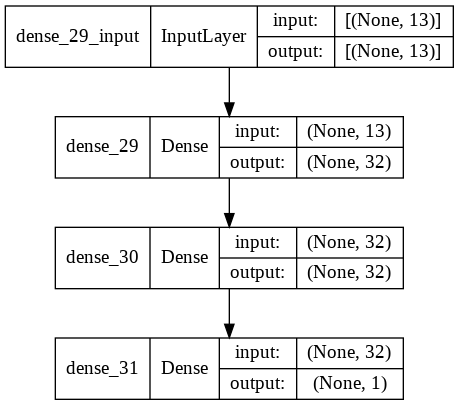

In [33]:
keras.utils.plot_model(ANN(), "boston_housing_model.png", show_shapes=True)

In [34]:
from keras.wrappers.scikit_learn import KerasRegressor
clf = KerasRegressor(build_fn=ANN, verbose=0)
scores = cross_val_score(clf, x, y, cv=3,scoring='neg_mean_squared_error')
print("MSE:"+ str(-scores.mean()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  


MSE:36.95175301785053


In [ ]:
'''#ANN
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
def ANN(optimizer = 'adam',neurons=32,batch_size=32,epochs=50,activation='relu',patience=5,loss='mse'):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(X.shape[1],), activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer = optimizer, loss=loss)
    early_stopping = EarlyStopping(monitor="loss", patience = patience)# early stop patience
    history = model.fit(X, y,
              batch_size=batch_size,
              epochs=epochs,
              callbacks = [early_stopping],
              verbose=0) #verbose set to 1 will show the training process
    return model'''

In [ ]:
'''clf = KerasRegressor(build_fn=ANN, verbose=0)
scores = cross_val_score(clf, x, y, cv=3,scoring='neg_mean_squared_error')
print("MSE:"+ str(-scores.mean()))'''

# **HPO Algorithm 1:Grid Search**

In [36]:
#Random Forest
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': [10, 20, 30],
    #'max_features': ['sqrt',0.5],
    'max_depth': [15,20,30,50],
    #'min_samples_leaf': [1,2,4,8],
    #"bootstrap":[True,False],
    #"criterion":['mse','mae']
}
clf = RandomForestRegressor(random_state=0)
grid = GridSearchCV(clf, rf_params, cv=3, scoring='neg_mean_squared_error')
grid.fit(x, y)
print(grid.best_params_)
print("MSE:"+ str(-grid.best_score_))

{'max_depth': 30, 'n_estimators': 10}
MSE:28.068229100920448


In [37]:
#SVM
from sklearn.model_selection import GridSearchCV
rf_params = {
    'C': [1,10, 100],
    "kernel":['poly','rbf','sigmoid'],
    "epsilon":[0.01,0.1,1]
}
clf = SVR(gamma='scale')
grid = GridSearchCV(clf, rf_params, cv=3, scoring='neg_mean_squared_error')
grid.fit(x, y)
print(grid.best_params_)
print("MSE:"+ str(-grid.best_score_))

{'C': 100, 'epsilon': 0.01, 'kernel': 'poly'}
MSE:67.07644831331122


In [38]:
#KNN
from sklearn.model_selection import GridSearchCV
rf_params = {
    'n_neighbors': [2, 3, 5,7,10]
}
clf = KNeighborsRegressor()
grid = GridSearchCV(clf, rf_params, cv=3, scoring='neg_mean_squared_error')
grid.fit(x, y)
print(grid.best_params_)
print("MSE:"+ str(-grid.best_score_))

{'n_neighbors': 5}
MSE:81.48773186343571


In [39]:
#ANN
from sklearn.model_selection import GridSearchCV
rf_params = {
    'optimizer': ['adam','rmsprop'],
    'activation': ['relu','tanh'],
    'loss': ['mse','mae'],
    'batch_size': [16,32],
    'neurons':[16,32],
    'epochs':[20,50],
    'patience':[2,5]
}
clf = KerasRegressor(build_fn=ANN, verbose=0)
grid = GridSearchCV(clf, rf_params, cv=3,scoring='neg_mean_squared_error')
grid.fit(x, y)
print(grid.best_params_)
print("MSE:"+ str(-grid.best_score_))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  if sys.path[0] == '':


{'activation': 'tanh', 'batch_size': 32, 'epochs': 50, 'loss': 'mae', 'neurons': 32, 'optimizer': 'adam', 'patience': 5}
MSE:43.998673250069295
